<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/Analyse_ACP_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Création d'un DataFrame
data = {
    "Cours": [
        "Initiation à Python", "Fondamentaux de Java", "Développement web avec PHP",
        "Bases de données SQL", "Framework Django", "Introduction au JavaScript",
        "Data Science avec R", "Sécurité informatique", "Machine Learning avec Python",
        "Conception UX/UI"
    ],
    "Nombre d'heures": [10, 15, 20, 12, 25, 8, 30, 18, 40, 5],
    "Difficulté": ["Facile", "Moyenne", "Moyenne", "Facile", "Difficile", "Facile",
                   "Difficile", "Moyenne", "Difficile", "Facile"],
    "Nombre de quiz": [5, 7, 10, 4, 8, 3, 12, 6, 15, 2]
}

df = pd.DataFrame(data)

# Ajoutons une nouvelle colonne avec des données fictives pour le pourcentage de réussite
df['Pourcentage de réussite'] = [92, 75, 75, 88, 60, 93, 68, 78, 59, 95]


# Mapping des niveaux de difficulté en valeurs numériques
difficulty_mapping = {
    "Facile": 1,
    "Moyenne": 2,
    "Difficile": 3
}

# Appliquer le mapping à la colonne "Difficulté"
df["Difficulté"] = df["Difficulté"].map(difficulty_mapping)

print(df)


                          Cours  Nombre d'heures  Difficulté  Nombre de quiz  \
0           Initiation à Python               10           1               5   
1          Fondamentaux de Java               15           2               7   
2    Développement web avec PHP               20           2              10   
3          Bases de données SQL               12           1               4   
4              Framework Django               25           3               8   
5    Introduction au JavaScript                8           1               3   
6           Data Science avec R               30           3              12   
7         Sécurité informatique               18           2               6   
8  Machine Learning avec Python               40           3              15   
9              Conception UX/UI                5           1               2   

   Pourcentage de réussite  
0                       92  
1                       75  
2                       75  
3  

In [3]:
# Centrer et réduire les données numériques
df_num = df.select_dtypes(include=['int64', 'float64'])  # Sélectionner uniquement les données numériques

# Calculer la moyenne et l'écart-type pour chaque colonne
mean = df_num.mean()
std = df_num.std()

# Centrer et réduire les données (pour chaque élément, soustraire la moyenne et diviser par l'écart-type)
df_normalized = (df_num - mean) / std

print(df_normalized)

   Nombre d'heures  Difficulté  Nombre de quiz  Pourcentage de réussite
0        -0.765484   -1.027872       -0.532535                 1.023637
1        -0.304349    0.114208       -0.048412                -0.246569
2         0.156786    0.114208        0.677772                -0.246569
3        -0.581030   -1.027872       -0.774597                 0.724765
4         0.617921    1.256289        0.193649                -1.367339
5        -0.949938   -1.027872       -1.016658                 1.098355
6         1.079055    1.256289        1.161895                -0.769595
7        -0.027668    0.114208       -0.290474                -0.022415
8         2.001325    1.256289        1.888079                -1.442057
9        -1.226619   -1.027872       -1.258720                 1.247791


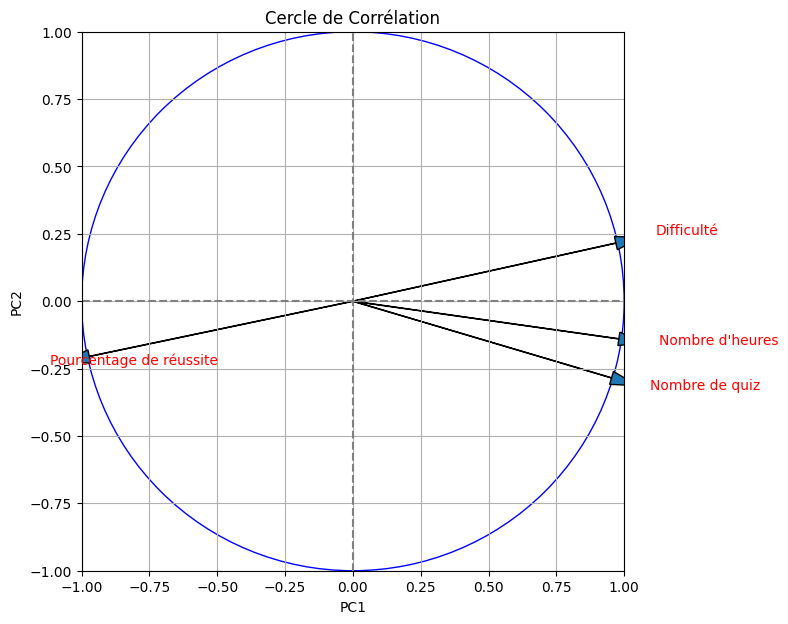

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Effectuer l'ACP
pca = PCA(n_components=2)  # On se limite aux deux premières composantes
X_r = pca.fit_transform(df_normalized)

# Les loadings sont les composantes de pca.components_
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Création du cercle de corrélation
fig, ax = plt.subplots(figsize=(7, 7))
circle = plt.Circle((0, 0), 1, color='blue', fill=False)

ax.add_artist(circle)

# Ajout des vecteurs des loadings
for i in range(len(loadings)):
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.05, head_length=0.1)
    plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, df_normalized.columns[i], color='red')

# Limites et étiquettes du graphique
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Cercle de Corrélation')

# Affichage du cercle de corrélation
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid()
plt.show()

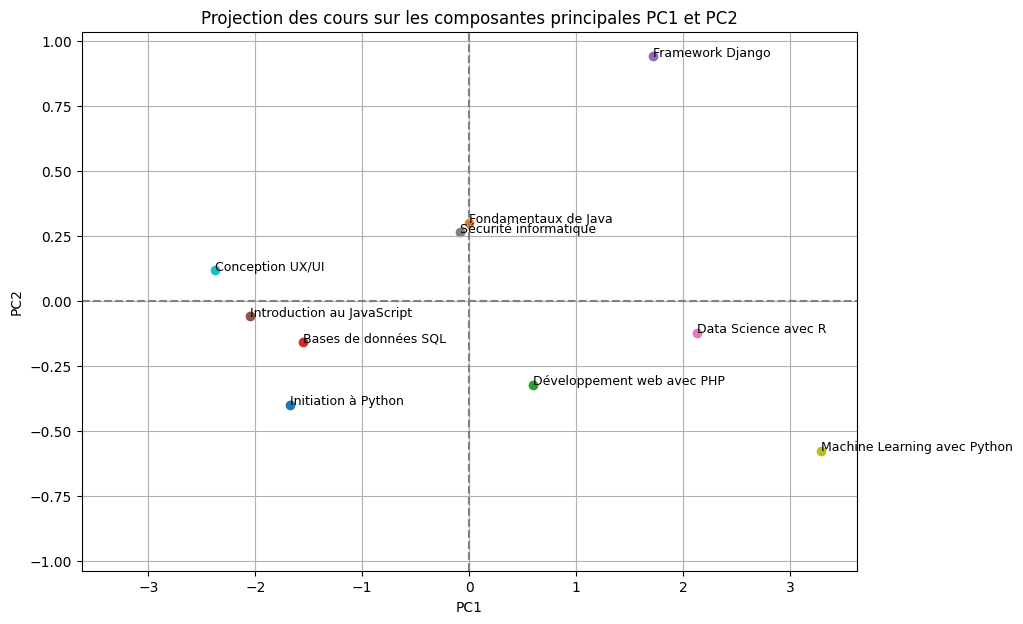

In [8]:
# Création du graphique du nuage de points
fig, ax = plt.subplots(figsize=(10, 7))

# Projection des individus (cours) sur les PC1 et PC2
for i in range(len(X_r)):
    plt.scatter(X_r[i, 0], X_r[i, 1])
    plt.text(X_r[i, 0], X_r[i, 1], df['Cours'][i], fontsize=9)

# Définir les limites pour une meilleure lisibilité, ajustez-les au besoin
x_lim = max(abs(X_r[:, 0])) * 1.1
y_lim = max(abs(X_r[:, 1])) * 1.1
ax.set_xlim(-x_lim, x_lim)
ax.set_ylim(-y_lim, y_lim)

# Titres et étiquettes des axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection des cours sur les composantes principales PC1 et PC2')

# Lignes de référence
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid()

# Affichage du graphique
plt.show()
